#### Теоретическая справка
**Цель:** Разделить автомобили на классы по стоимости и предсказать эти классы с помощью логистической регрессии или метода опорных векторов  

**Задачи:**
* Разбить экземпляры на классы по стоимости
* Взять датасет из дз1 в котором уже обработаны пропуски, типы данных, выбросы и коррелируемые признаки
* Обработать признаки коррелирующие с целевым классом
* Обучить модели логистической регрессии и метода опорных векторов с подбором гиперпараметров  

**Описание алгоритмов:** При обучении необходимо учесть что решаем задачу многоклассовой классификации. Для SVM наиболее интересным для подбора параметров является ядро,

### Теоретическая справка про логистическую регрессию из конспекта с лекции:

Логистическая регрессия используется для предсказания непрерывной переменной со значениями на отрезке , что интерпретируется как вероятность принадлежности объекта к положительному классу. Модель строится на основе линейной функции $\langle w, x_i \rangle$, которая преобразуется в вероятность через логит-преобразование — логарифм отношения вероятности положительного события к отрицательному:

$$
\langle w, x_i \rangle = \log \frac{p}{1-p}
$$

откуда

$$
p = \frac{1}{1 + e^{-\langle w, x_i \rangle}}
$$

Функция $$ p = \sigma(M) = \frac{1}{1 + e^{-M}} $$ называется сигмоидой и отображает всю числовую прямую на интервал (0; 1). Она монотонно возрастает и обладает свойством $\sigma(-x) = 1 - \sigma(x)$.

Функция потерь для логистической регрессии имеет вид:

$$
L(M_i) = \log(1 + e^{-M})
$$

где $M_i$ — линейная комбинация признаков и параметров модели.

Оптимизация параметров $w$ проводится методом максимума правдоподобия для распределения Бернулли. Функция правдоподобия:

$$
p(y|X, w) = \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1 - y_i}
$$

логарифмируется и переписывается так:

$$
\ell(w, X, y) = \sum_{i=1}^n \big(y_i \log \sigma(\langle w, x_i \rangle) + (1 - y_i) \log \sigma(-\langle w, x_i \rangle)\big)
$$

Максимизация правдоподобия эквивалентна минимизации следующей функции потерь:

$$
L(w, X, y) = - \sum_{i=1}^n \big(y_i \log \sigma(\langle w, x_i \rangle) + (1 - y_i) \log \sigma(-\langle w, x_i \rangle)\big)
$$

Для решения задачи минимизации применяются методы стохастического градиента и Ньютона-Рафсона.

Кратко:
Логистическая регрессия — это линейная модель, преобразующая линейную комбинацию признаков через сигмоидную функцию для получения вероятности принадлежности к классу, обучаемая по принципу максимума правдоподобия для распределения Бернулли с бинарным откликом.


Теоретическая справка про метод опорных векторов (SVM) из конспекта с лекции:

Метод опорных векторов (SVM) — это линейный классификатор для задачи обучения с учителем. Имеется выборка объектов $(x_i, y_i)$, где $x_i \in \mathbb{R}^p$, а метки $y_i \in \{-1, 1\}$. Цель — построить классифицирующее правило $f : \mathbb{R}^p \to \{-1, 1\}$, которое максимально точно разделит классы.

Простейшая модель — линейный классификатор:

$$
f(x_i) = \text{sign}(\langle x_i, w \rangle - w_0)
$$

где $w$ — вектор весов, $w_0$ — смещение, а $\langle \cdot, \cdot \rangle$ — скалярное произведение.

Ключевое понятие — величина отступа (margin):

$$
M_i(w, w_0) = (\langle x_i, w \rangle - w_0) y_i
$$

Чем меньше отступ, тем ближе объект к границе классов и выше вероятность ошибки.

Для линейно разделимых классов SVM старается найти такую разделяющую гиперплоскость, при которой расстояние (ширина полосы) между двумя параллельными гиперплоскостями, отстоящими от неё и содержащими опорные вектора, будет максимальным. Ширина полосы равна (в конспекте есть подробный вовод)

$$
\frac{2}{\|w\|}
$$

Оптимизационная задача:

$$
\min_{w, w_0} \frac{1}{2} \|w\|^2
$$

при ограничениях

$$
y_i(\langle w, x_i\rangle - w_0) \geq 1
$$

На практике классы часто не линейно разделимы, поэтому вводят soft-margin, допускающий ошибки с параметрами $\xi_i \geq 0$, контролирующими величину ошибки и штраф $C$:

$$
\min_{w, w_0, \xi} \frac{1}{2} \|w\|^2 + C \sum_i \xi_i
$$

при ограничениях

$$
y_i(\langle w, x_i \rangle - w_0) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Функция потерь допускает ошибку, если объект попадает внутрь полосы разделения или классифицируется неверно.

Для решения задачи строится двойственная задача с помощью функции Лагранжа, где вектор весов выражается через линейную комбинацию обучающих примеров с коэффициентами Лагранжа $\lambda_i$. В результате классификатор зависит только от опорных векторов (точек с $\lambda_i > 0$):

$$
a(x) = \text{sign}\left(\sum_i \lambda_i y_i \langle x_i, x \rangle - w_0 \right)
$$

Параметр $C$ выбирается с помощью методов кросс-валидации.

Для нелинейно разделимых данных применяется метод ядровых функций (Kernel Trick), который заменяет скалярные произведения в исходном пространстве на функцию ядра $$ K(x, x') = \langle \psi(x), \psi(x') \rangle $$ в пространстве признаков, позволяя эффективно работать в преобразованном пространстве без явного вычисления преобразования $\psi$. Ядры должны быть симметричными и положительно определёнными. Популярные ядра: линейное, полиномиальное, радиальное базисное (RBF), сигмоидное.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import math

### Data Processing

In [ ]:
df = pd.read_csv('data/df_after_hw_1.csv')
df.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,min_mpg,...,model_freq,engine_freq,transmission_freq,interior_color_freq,exterior_color_freq,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive,drivetrain_Unknown,avg_mpg
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,True,5,23.112245,...,46,146,3133,8151,67,True,False,False,False,26.653622
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,True,5,19.934066,...,2,4,2754,8151,2,True,False,False,False,23.543956
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,True,5,15.921788,...,1,184,2754,647,52,True,False,False,False,18.502793
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,True,5,17.522801,...,7,350,2754,739,274,True,False,False,False,20.982812
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,True,5,22.470811,...,34,486,1588,8151,1065,False,True,False,False,25.922765


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         19066 non-null  object 
 1   model                         19066 non-null  object 
 2   year                          19066 non-null  float64
 3   mileage                       19066 non-null  float64
 4   engine                        19066 non-null  object 
 5   engine_size                   19066 non-null  float64
 6   transmission                  19066 non-null  object 
 7   automatic_transmission        19066 non-null  bool   
 8   fuel_type                     19066 non-null  int64  
 9   min_mpg                       19066 non-null  float64
 10  max_mpg                       19066 non-null  float64
 11  damaged                       19066 non-null  bool   
 12  first_owner                   19066 non-null  bool   
 13  p

Данный датасет на kaggle включает в себя файлы train и test. Понятно, что в файле test пропуски и изменения нужно заполнять по данным из набора train, но в рамках задачи достаточно того количества экземпляров, которые есть в тренировчном наборе, следовательно продолжаем работать с ним.

Переделаем задачу регрессии под задачу классификации. Разобьем автомобили разных ценовых категорий по классам.

In [ ]:
bins = [-float('inf'), 10000, 25000, 50000, 100000, float('inf')]
labels_y = ['low', 'mid-', 'mid', 'mid+', 'high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels_y, right=False).astype('category')
df['price_category'].value_counts()

price_category
mid     9011
mid-    5674
mid+    2825
low     1052
high     504
Name: count, dtype: int64

классы получились дисбалансными

Обработка корреляций между признаками была выполнена в рамках первого дз. рассмотрим корреляцию с целевой переменной.

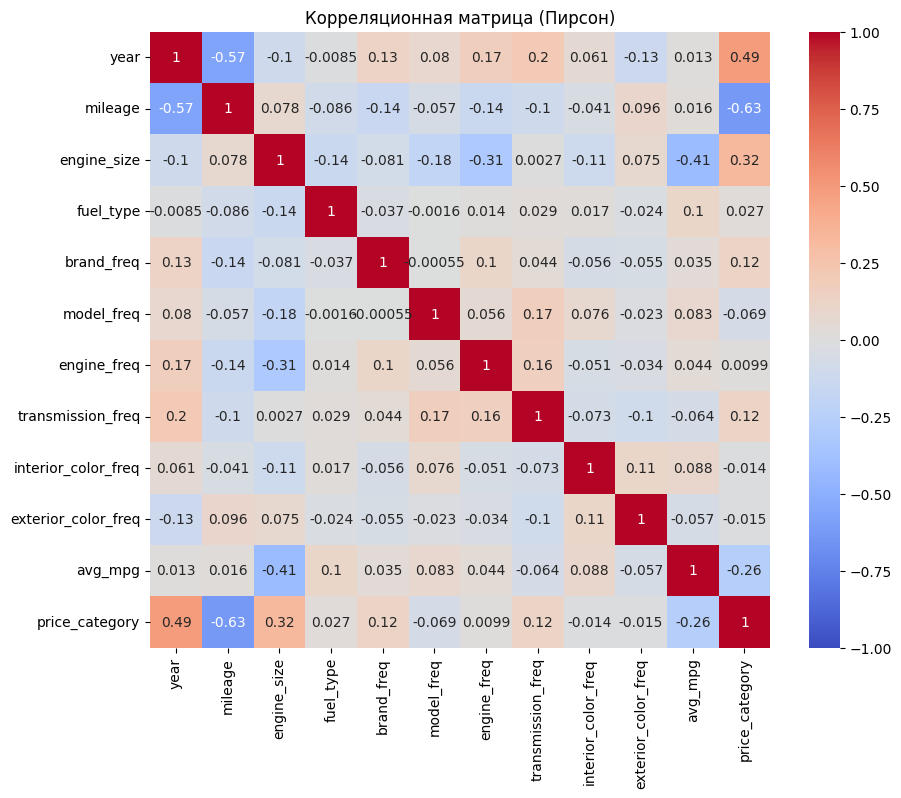

In [ ]:
df_numeric = df.drop(columns=['brand', 'model', 'engine', 'transmission', 'interior_color', 'exterior_color', 'min_mpg', 'max_mpg', 'price'])
bool_cols = df_numeric.select_dtypes(include='bool').columns
df_numeric = df_numeric.drop(columns=bool_cols)

mapping_y = {label: idx - 2 for idx, label in enumerate(labels_y)}
df_numeric['price_category'] = df_numeric['price_category'].map(mapping_y)

corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица (Пирсон)')
plt.show()

Видим, что у численных признаков значение корреляции с таргетом довольно низкое. Это может негативно сказаться на качестве логистической регрессии.

Отдельно посмотрим на распределеения булевых признаков по ценовым категориям. Идея в том, чтобы удалить признаки которые одинаково распределены по ценовым категориям, т.к. если показатели распределны одинаково, то модель не определит к какому классу наиболее вероятно соответсвует признак.

P.s. метод pd.crosstab был использован согласно документации, для построения графиков использовалась llm (могу объяснить каждый параметр, т.к. читал доку и использовал исключительно для экономии времени)

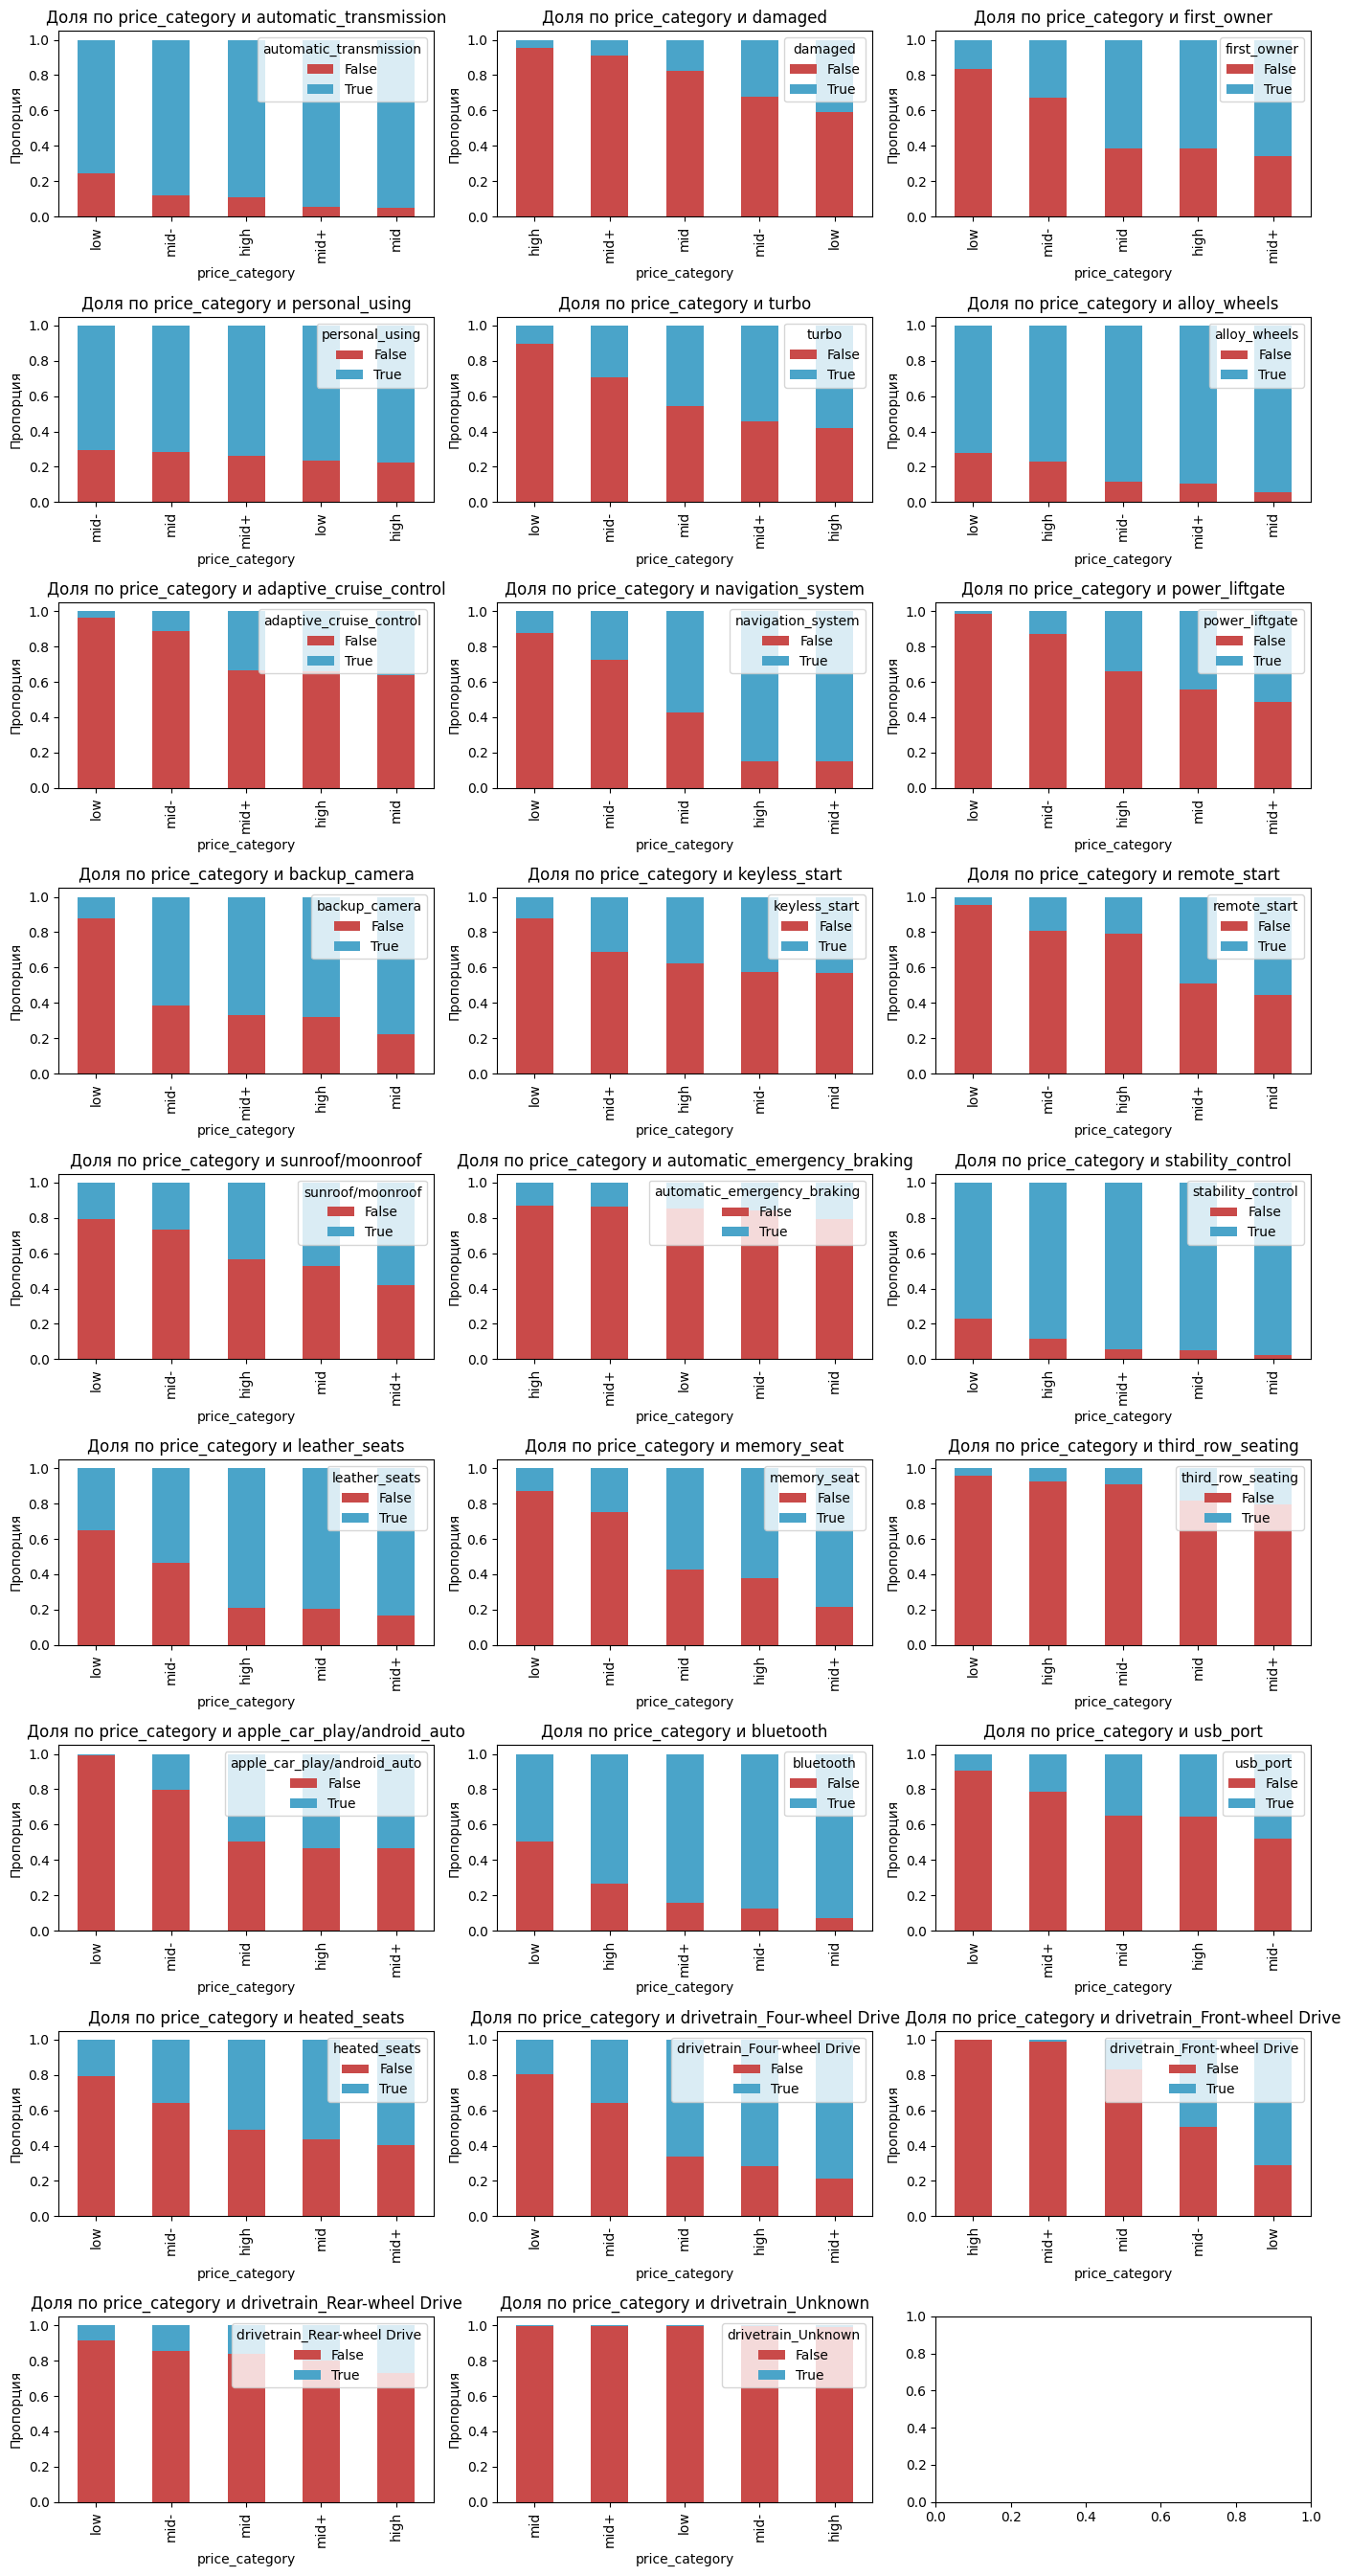

In [ ]:
n = len(bool_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(bool_cols):
    ct = pd.crosstab(df['price_category'], df[col], normalize='index')
    ct = ct.sort_values(by=True)


    ct.plot(
        kind='bar', stacked=True, color=['#c94a49', '#4aa4c9'], ax=axes[i]
    )
    axes[i].set_title(f'Доля по price_category и {col}')
    axes[i].set_xlabel('price_category')
    axes[i].set_ylabel('Пропорция')
    axes[i].legend(title=col, labels=['False', 'True'], loc='upper right')

plt.tight_layout()
plt.show()


Видим что признаки personal_using, automatic_emergency_braking и drivetrain_Unknown распределены по классам стоимости примерно одинаково, поэтому их можно удалить.

In [ ]:
df = df.drop(columns=['personal_using', 'automatic_emergency_braking', 'drivetrain_Unknown'])

In [ ]:
data_new = df.drop(columns=['brand', 'model', 'engine', 'transmission', 'interior_color', 'exterior_color', 'min_mpg', 'max_mpg', 'price'])
X = data_new.drop(columns=['price_category'])
y = data_new['price_category']

Из интереса взгялянем на t-SNE проекцию данных на плоскость и сделаем предположение о качестве SVM

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

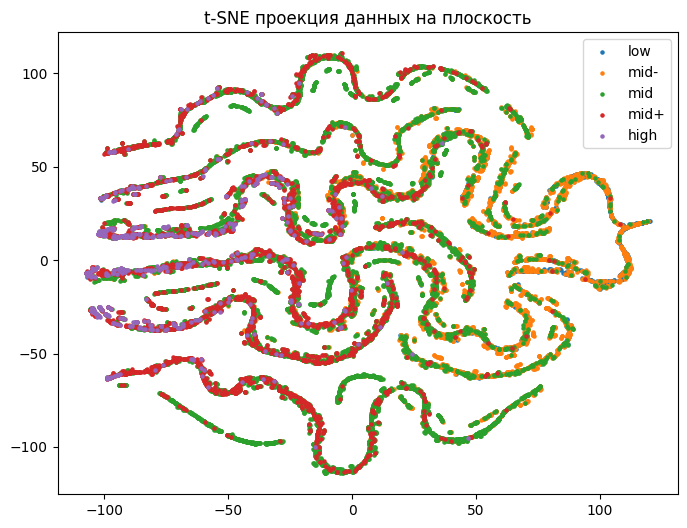

In [ ]:
plt.figure(figsize=(8, 6))
for class_value in labels_y:
    indices = y == class_value
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=f'{class_value}', s=5)

plt.legend()
plt.title('t-SNE проекция данных на плоскость')
plt.show()


Ожидаем что наилучшее качество SVM даст для классов mid, mid+ и mid-, т.к. есть участки заполненные преимущественно этими классами.

Поделим данные на тренировчную и тестовую выборки и стандартизируем некоторые признаки. Возьмем код из первого дз.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_scale = ['year', 'mileage', 'engine_size', 'avg_mpg',
                    'brand_freq', 'model_freq', 'engine_freq', 'transmission_freq',
                    'interior_color_freq', 'exterior_color_freq']

scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

### LogisticRegression

Мультиномиальная регрессия часто показывает лучшие результаты по сравнению с логистической регрессией с multi_class='ovr' (one-vs-rest) из-за фундаментальных различий в подходах к многоклассовой классификации:

-    В мультиномиальной регрессии все классы рассматриваются одновременно в рамках единой оптимизационной задачи. Модель минимизирует общую функцию потерь, что отражает взаимосвязи между всеми классами и приводит к согласованным прогнозам вероятностей для всей выборки.

-   В подходе one-vs-rest строится отдельный бинарный классификатор для каждого класса, который пытается отделить этот класс от всех остальных. При этом каждый классификатор обучается независимо, без учёта взаимосвязей между классами. Это может привести к более простым и менее точным границам решений.

На двух запусках зафиксируем параметры class_weight='balanced' удобно использовать для дисбалансных классов, solver='lbfgs' подходит для оптимизации при больших наборах данных и для многоклассовых задач, обеспечивает стабильную сходимость, а параметр multi_class изменим.

Возьмем кусок кода с практики, но добавим комментарии про параметр avarage f1 метрики и подбор гиперпараметров. Дабы не заниматься копипастом сделаем пару отдельных запусков и перебор с помощью GridSearch

In [ ]:

reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=40000,
    random_state=42,
    class_weight='balanced'
)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
f1_macro = f1_score(y_test, y_pred, average='macro') * 100          # среднее без учета веса классов
f1_weighted = f1_score(y_test, y_pred, average='weighted') * 100    # среднее с учетом веса классов
per_class = f1_score(y_test, y_pred, average=None) * 100            # F1 для каждого класса отдельно


print(f"Accuracy: {acc:.2f}%")
print(f"F1-macro: {f1_macro:.2f}%")
print(f"F1-weighted: {f1_weighted:.2f}%")
print("F1 per class (%):", per_class)

/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 68.83%
F1-macro: 62.03%
F1-weighted: 70.00%
F1 per class (%): [44.31818182 61.67557932 74.9465975  56.3227308  72.87110284]


In [ ]:

reg = LogisticRegression(
    multi_class='ovr',
    solver='lbfgs',
    max_iter=40000,
    random_state=42,
    class_weight='balanced'
)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
f1_macro = f1_score(y_test, y_pred, average='macro') * 100
f1_weighted = f1_score(y_test, y_pred, average='weighted') * 100
per_class = f1_score(y_test, y_pred, average=None) * 100


print(f"Accuracy: {acc:.2f}%")
print(f"F1-macro: {f1_macro:.2f}%")
print(f"F1-weighted: {f1_weighted:.2f}%")
print("F1 per class (%):", per_class)

/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 68.46%
F1-macro: 59.35%
F1-weighted: 69.14%
F1 per class (%): [36.59574468 54.54545455 73.50952674 59.56521739 72.53126348]


Видим что мультиномиальная регрессия лучше справляется с предсказанием, чем one-vs-rest, будем считать мультиномиальную регрессию основным алгоритмом.

Т.к. в последних версиях библиотке multi_class был удален и по умолчанию multinomial, то не будем включать этот параметр в сетку. n_jobs=6 по количеству ядер процессора. (для удобства я работаю с ноутбуками локально в vs code, а после выгружаю в коллаб)

In [ ]:
model = LogisticRegression(max_iter=40000, random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'sag', 'saga', 'lbfgs'],
    'class_weight': ['balanced', None],
}
grid_search = GridSearchCV(model, param_grid, n_jobs=6, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

{'C': 100, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
0.7514295596047169


Предупреждения связаны с тем что для некоторых параметров алгоритм не сошелся, а также некоторые параметры не совместимы друг с другом.

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
f1_macro = f1_score(y_test, y_pred, average='macro') * 100
f1_weighted = f1_score(y_test, y_pred, average='weighted') * 100
per_class = f1_score(y_test, y_pred, average=None) * 100


print(f"Accuracy: {acc:.2f}%")
print(f"F1-macro: {f1_macro:.2f}%")
print(f"F1-weighted: {f1_weighted:.2f}%")
print("F1 per class (%):", per_class)

Accuracy: 74.65%
F1-macro: 63.10%
F1-weighted: 74.16%
F1 per class (%): [37.58389262 59.49008499 80.32961191 61.48409894 76.61290323]


Видим, что наилучший результат по метрике для сетки f1_weights параметр class_weight=None. В связи с этим получили низкие показатели для класса low. Сделаем контрольный запуск изменив только этот параметр.

In [ ]:
reg = LogisticRegression(
    solver='saga',
    penalty='l1',
    max_iter=40000,
    random_state=42,
    C=100,
    class_weight='balanced'
)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100
f1_macro = f1_score(y_test, y_pred, average='macro') * 100
f1_weighted = f1_score(y_test, y_pred, average='weighted') * 100
per_class = f1_score(y_test, y_pred, average=None) * 100


print(f"Accuracy: {acc:.2f}%")
print(f"F1-macro: {f1_macro:.2f}%")
print(f"F1-weighted: {f1_weighted:.2f}%")
print("F1 per class (%):", per_class)

Accuracy: 68.64%
F1-macro: 61.92%
F1-weighted: 69.81%
F1 per class (%): [44.31818182 61.78571429 74.7179018  56.0371517  72.72727273]


Перебрав разные параметры для логистической регрессии получили низкое качество классификации, особенно для класса low. Это может быть связано с отсутствием линейной зависимости между признаками и таргетом. Для более детальной оценки качества рассмотрим матрицу ошибок.

price_category
mid     1804
mid-    1127
mid+     585
low      201
high      97
Name: count, dtype: int64


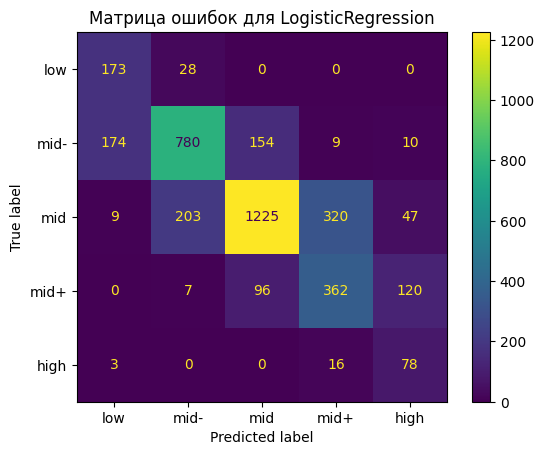

In [ ]:
print(y_test.value_counts())

reg_cm = confusion_matrix(y_test, y_pred, labels=labels_y)
reg_cm = ConfusionMatrixDisplay(confusion_matrix=reg_cm, display_labels=labels_y)
reg_cm.plot()
plt.title('Матрица ошибок для LogisticRegression')
plt.show()

Видим что модель допускает ошибки определяя объекты в соседние с настоящим классом. В контексте задачи это может означать, что для автомобиля претендующего на mid+ или mid- ценовую категорию (предсказание модели), настоящая цена будет в классе mid. Это ошибка не существенна, так как автовладельцы часто могут завысить цену или занизить, например, в зависимости от жадности или желания поскорее продать.

#### Итог: согласно метрикам модель имеет низкую точность, но в контексте задачи это допустимо.

### SVM

Для SVM аналогично class_weight='balanced', для многоклассовой классификации decision_function_shape='ovo' и probability=True, требуют больше ресурсов но дает более высокую точность в сравнении с ovr и False соответсвенно.

Полиномиальное ядро в SVM было выбрано по следующим причинам:

-    Сложная зависимость данных: Полиномиальное ядро умеет моделировать нелинейные границы классификации, учитывая сложные взаимодействия между признаками. Оно расширяет пространство признаков, позволяя захватывать полиномиальные зависимости, которые могут присутствовать в данных.

-   5 классов: Задача с множественными классами требует гибкой модели, способной определять более сложные разделяющие поверхности, чем плоские гиперплоскости. Полиномиальное ядро хорошо подходит для выделения таких поверхностей.

-    Количество признаков — 41: Среднее количество признаков позволяет использовать полиномиальные преобразования без чрезмерных вычислительных затрат, в отличие от RBF, который проецирует данные в бесконечномерное пространство. Это делает полиномиальное ядро удобным компромиссом между линейным и RBF.

Однако полиномиальное ядро требует подбора параметров.


In [ ]:
param_grid = {
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10, 100],
    'coef0': [0.0, 0.1, 1],
    'gamma': ['scale', 'auto']
}

svc = SVC(
    probability=True,
    kernel='poly',
    max_iter=50000,
    random_state=42,
    class_weight='balanced',
    decision_function_shape='ovo'
)

grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=6, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

acc = accuracy_score(y_test, y_pred) * 100
f1_macro = f1_score(y_test, y_pred, average='macro') * 100
f1_weighted = f1_score(y_test, y_pred, average='weighted') * 100
per_class = f1_score(y_test, y_pred, average=None) * 100


print(f"Accuracy: {acc:.2f}%")
print(f"F1-macro: {f1_macro:.2f}%")
print(f"F1-weighted: {f1_weighted:.2f}%")
print("F1 per class (%):", per_class)

Accuracy: 78.11%
F1-macro: 72.27%
F1-weighted: 78.63%
F1 per class (%): [61.01694915 66.79920477 82.62548263 71.13480579 79.76459937]


In [ ]:
model = SVC(max_iter=50000, random_state=42, class_weight='balanced')

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'decision_function_shape': ['ovo', 'ovr'],
    'probability': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=6, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/max/work_area/

{'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'probability': True}
0.7889505246083885


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
f1_macro = f1_score(y_test, y_pred, average='macro') * 100
f1_weighted = f1_score(y_test, y_pred, average='weighted') * 100
per_class = f1_score(y_test, y_pred, average=None) * 100


print(f"Accuracy: {acc:.2f}%")
print(f"F1-macro: {f1_macro:.2f}%")
print(f"F1-weighted: {f1_weighted:.2f}%")
print("F1 per class (%):", per_class)

Accuracy: 78.29%
F1-macro: 73.08%
F1-weighted: 78.77%
F1 per class (%): [63.5193133  67.72277228 82.4090638  71.98177677 79.76566021]


Согласно метрикам SVM модель справилась лучше чем модель LogisticRegression. Эти значения метрик будем считать достаточными, чтобы считать "хорошими". Так же посмотрим на матрицу ошибок.

price_category
mid     1804
mid-    1127
mid+     585
low      201
high      97
Name: count, dtype: int64


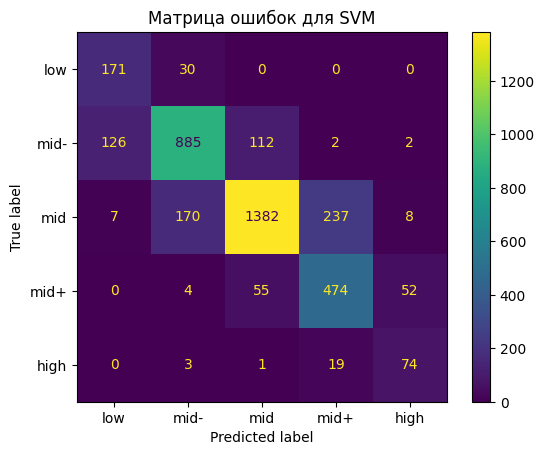

In [ ]:
print(y_test.value_counts())

svm_cm = confusion_matrix(y_test, y_pred, labels=labels_y)
svm_cm = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=labels_y)
svm_cm.plot()
plt.title('Матрица ошибок для SVM')
plt.show()

Присутсвует та же тенденция к предсказанию соседних классов с реальным. Как и в предыдущем случае считаем такого рода ошибки не существенными или погрешностью. Для "граничных" классов low и high accuracy ниже, чем при логистической регрессии (видно из графиков, сумма по строке деленная на ячейку пересечения pred и true), это согласуется с предположением сделанным на основе графика t-SNE.

#### Итог: модель подходит для решения этой задачи, что подтверждают метрики и обзор матрицы ошибок